In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
import warnings
warnings.simplefilter("ignore")

In [26]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [27]:
df.columns


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [28]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(29020, 19)

In [33]:
df["market_segment_type"].value_counts()

market_segment_type
Online           18550
Offline           8430
Corporate         1632
Complementary      312
Aviation            96
Name: count, dtype: int64

In [54]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'market_segment_type', 'room_type_reserved', 'booking_status']

num_cols = ['lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']    

In [50]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [23]:
### DATA ANALYSIS AND VISUALIZATION ###

In [36]:
data = df.copy()

In [37]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [38]:
data.drop(['booking_id', 'customer_id'], axis=1, inplace=True)

KeyError: "['booking_id', 'customer_id'] not found in axis"

In [39]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [40]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [41]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True, errors='ignore')

In [42]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [43]:
data = df.copy()

In [44]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [45]:
# UNIVARIATE ANALYSIS

In [ ]:
def num_plot_dist(df , num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette='skyblue')
        axes[i][0].set_title(f'Histogram of {column}', fontsize=14)

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='lightgreen')
        axes[i][1].set_title(f'Boxplot of {column}', fontsize=14)

    plt.tight_layout()
    plt.show()

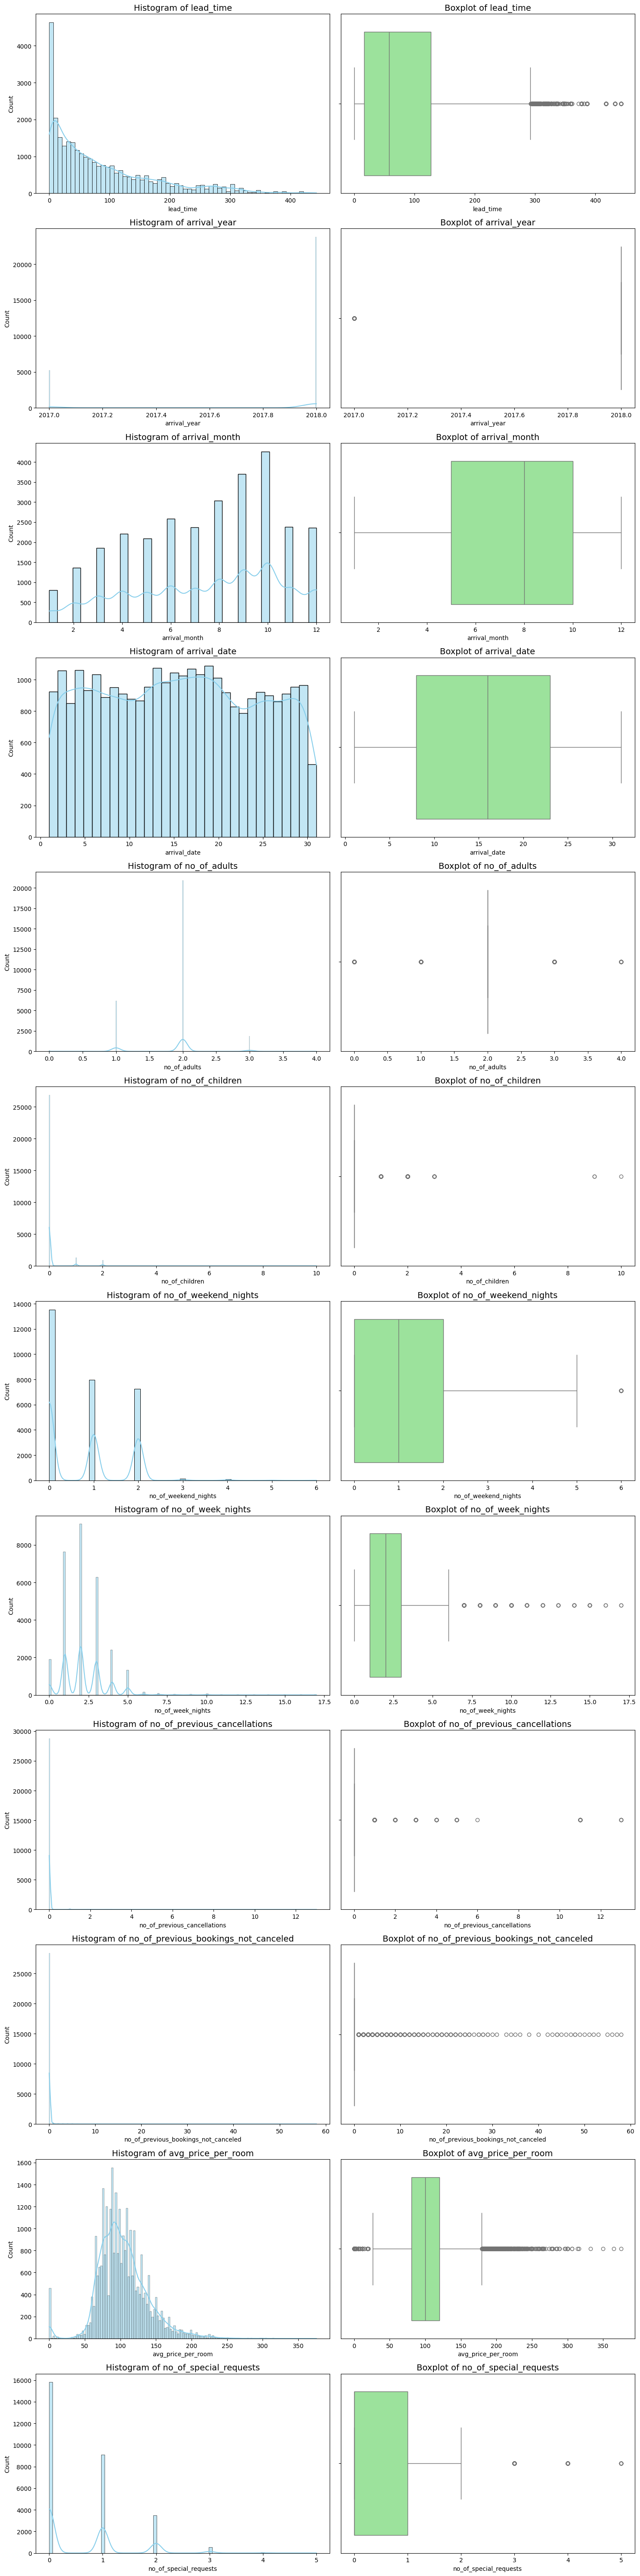

In [48]:
num_plot_dist(data, num_cols)

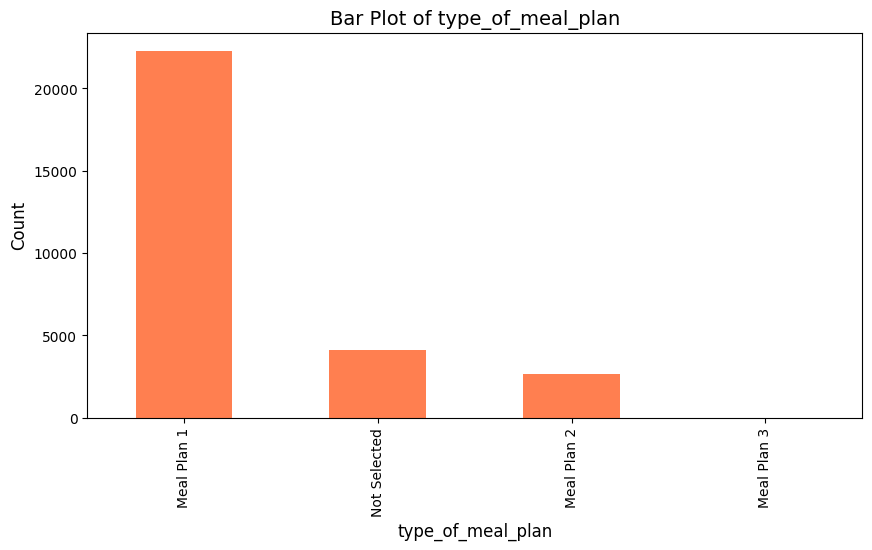

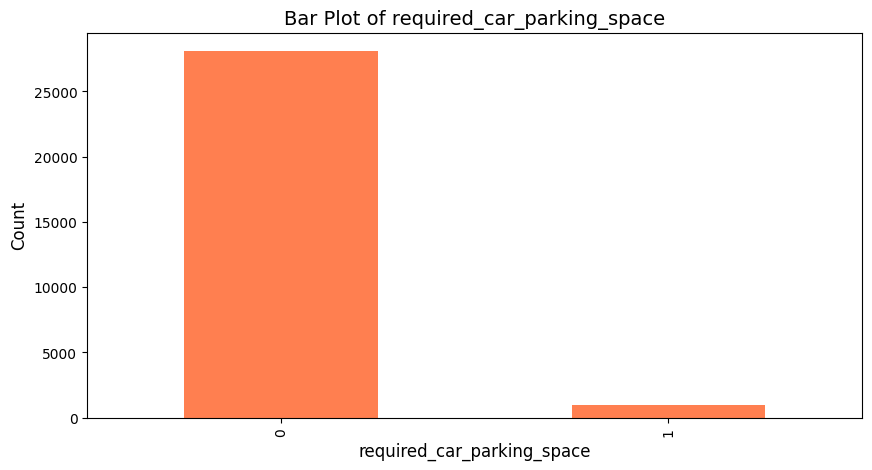

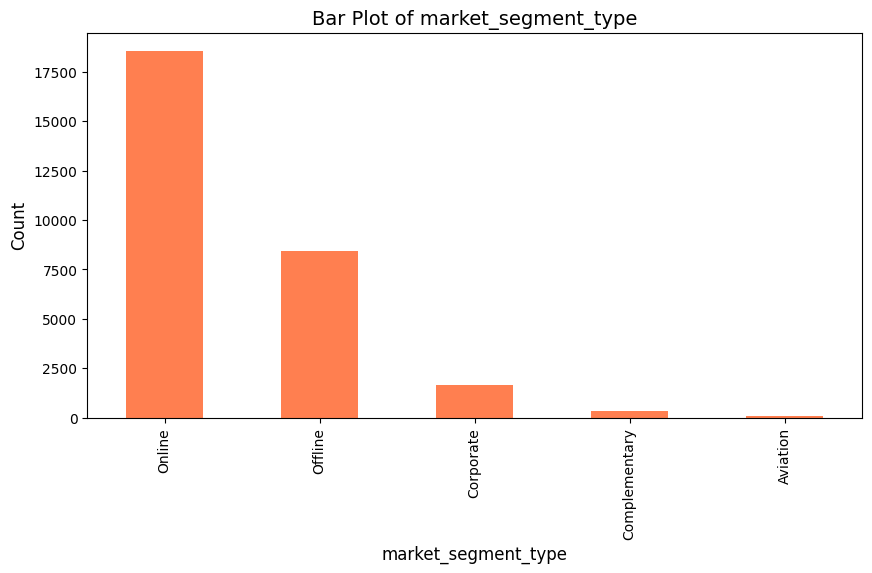

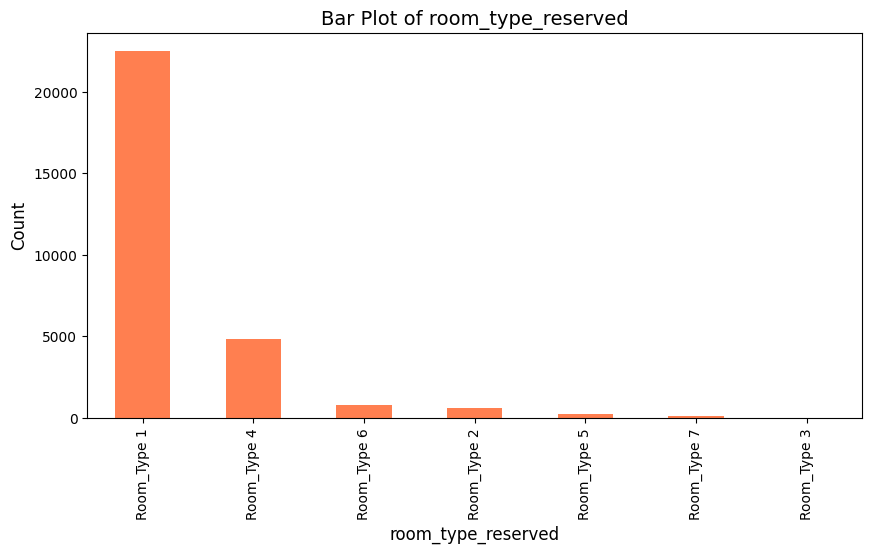

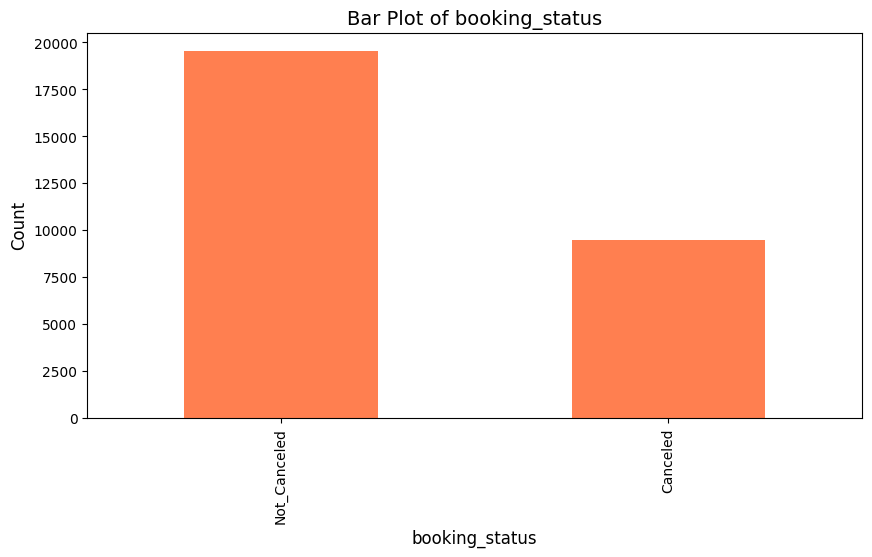

In [56]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 5))
    data[cat_feature].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Bar Plot of {cat_feature}', fontsize=14)
    plt.xlabel(cat_feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

In [53]:
df.columns


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
##### BIVARIATE ANALYSIS #####

In [58]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette='Blues')
        axes[i].set_title(f'Boxplot of {column} by {target}', fontsize=14)  

    plt.tight_layout()
    plt.show()

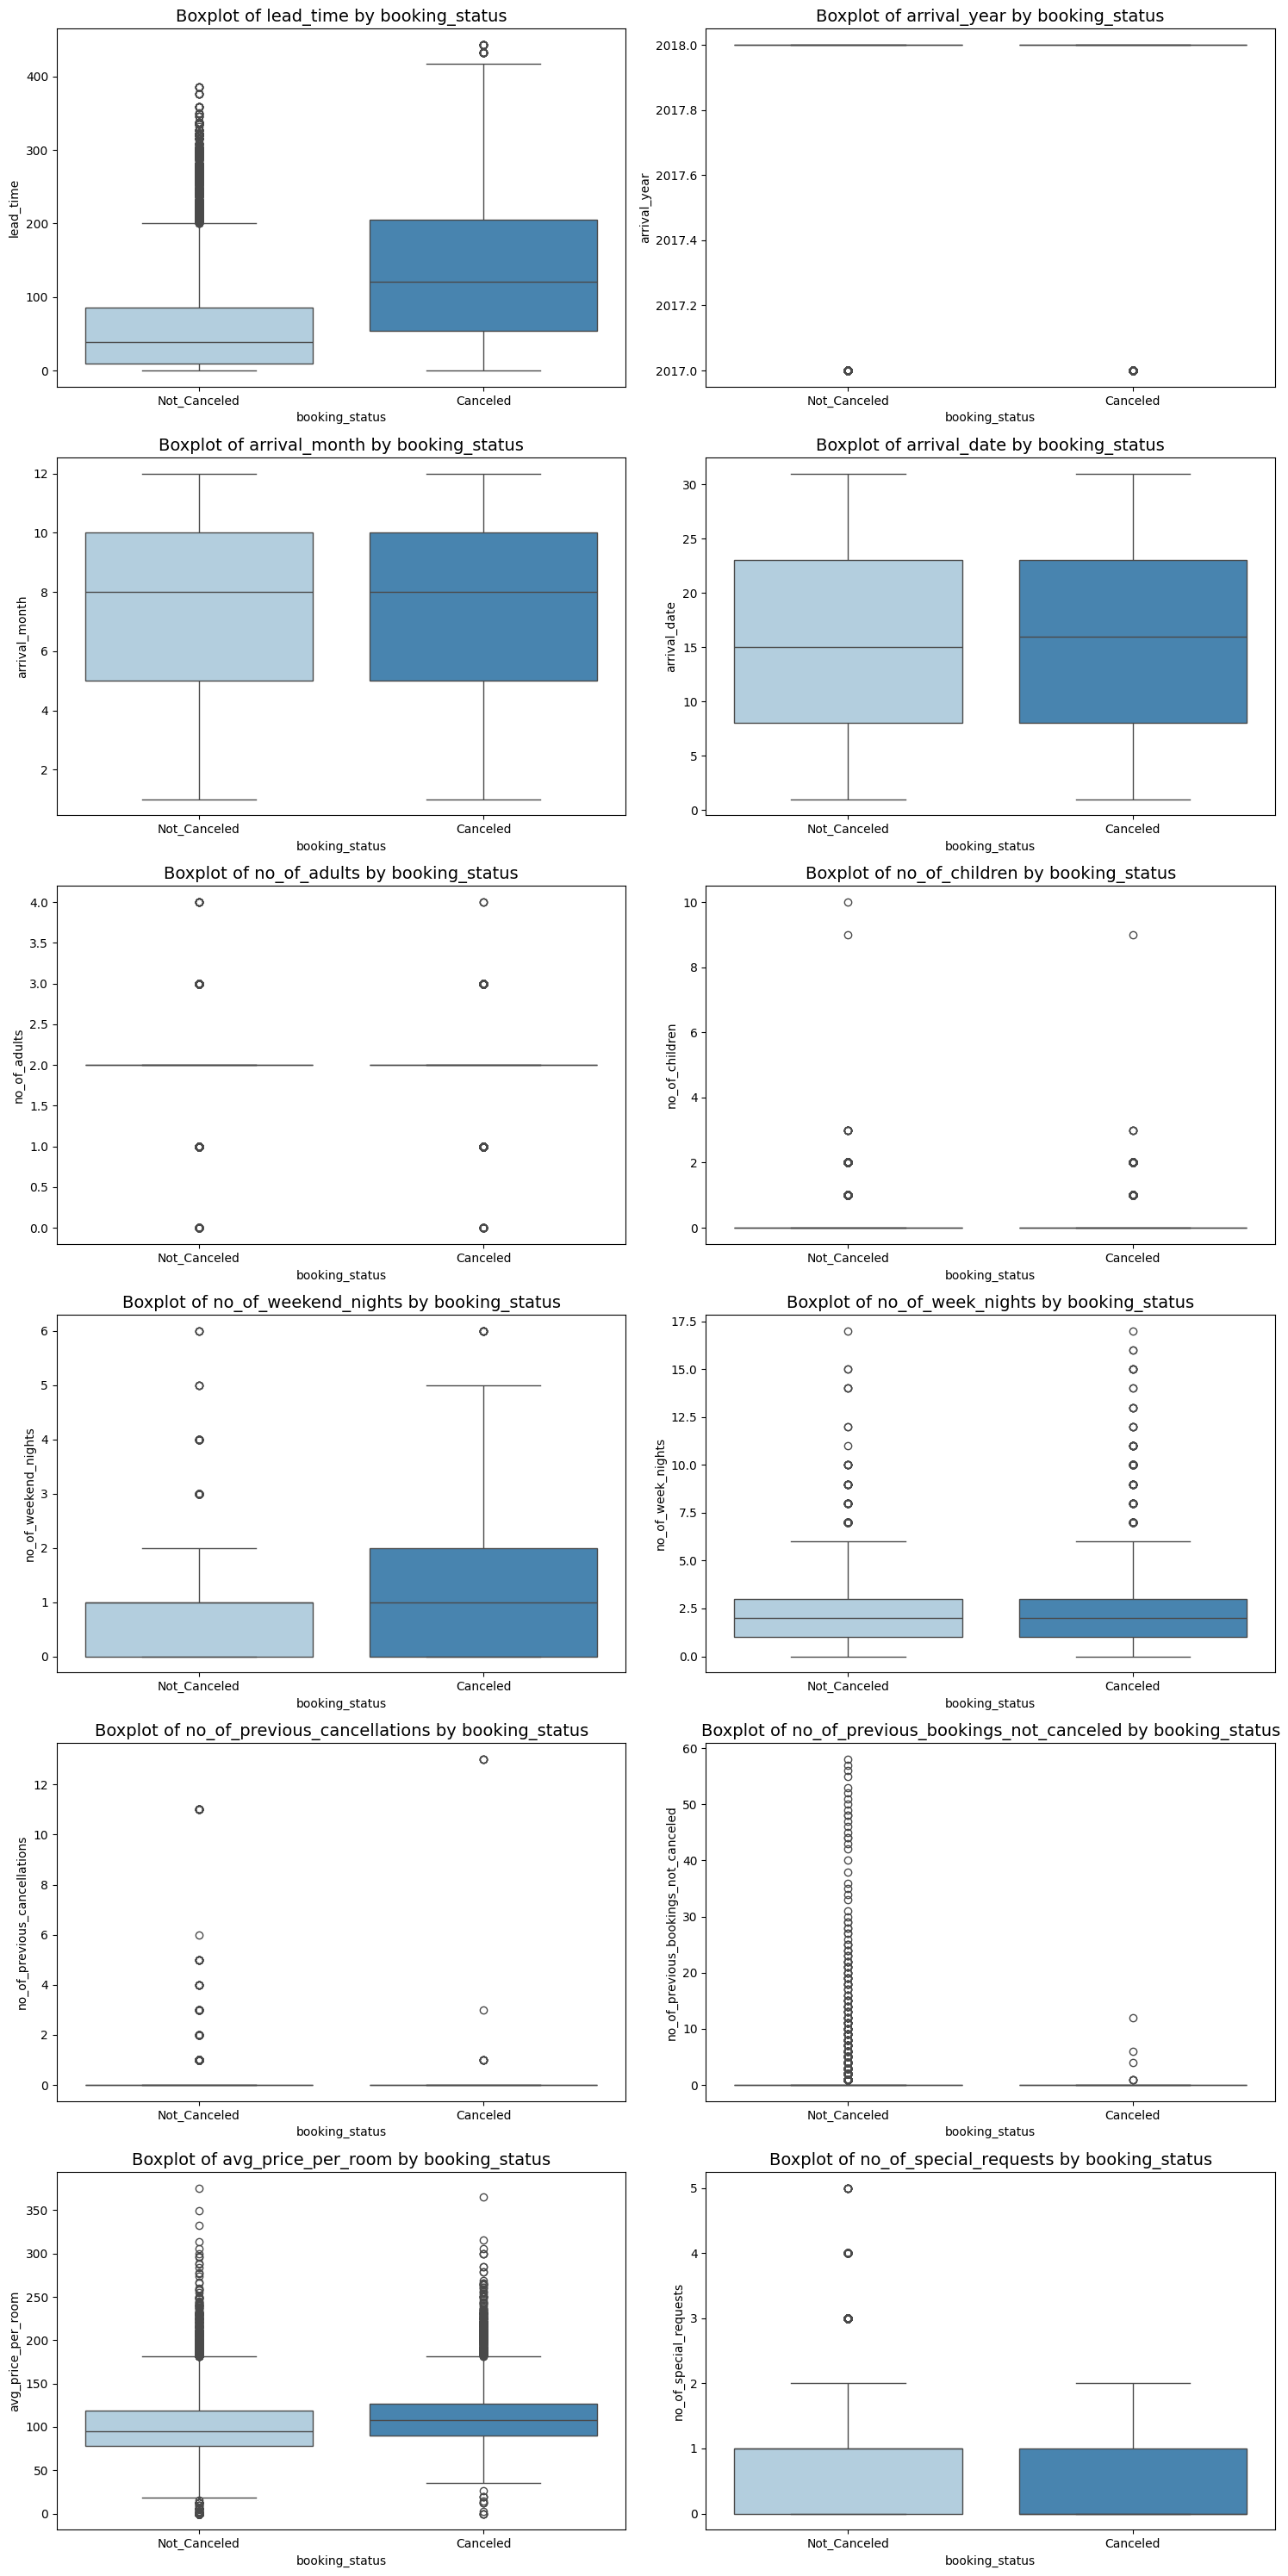

In [59]:
plot_bivariate_num(data, 'booking_status', num_cols)

In [60]:
#### DATA PREPROCESSING ####

In [61]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [63]:
#### LABEL ENCODING FOR CATEGORICAL FEATURES ####

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)) }
    

In [66]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [68]:
#### Multiculinearity Check ####

In [69]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 16.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 10.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.7 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --------

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [74]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [72]:
vif_data


,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [75]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [76]:
vif_data

,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


In [77]:
#### NO MULTICOLINEARITY DETECTED ####

In [78]:
corr = df.corr()

In [80]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.023206,0.105348,0.107088,0.025929,0.012601,0.270178,0.096849,0.076599,0.018676,0.021653,0.311844,-0.193910,-0.047723,-0.119168,0.298806,0.186752,-0.091468
no_of_children,-0.023206,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,0.049156,-0.003387,0.028185,0.135077,-0.036217,-0.016429,-0.021245,0.339916,0.126538,-0.030347
no_of_weekend_nights,0.105348,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,0.052698,-0.011612,0.029413,0.127151,-0.066445,-0.020146,-0.027981,-0.007783,0.059582,-0.056956
no_of_week_nights,0.107088,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.036798,0.037856,-0.007459,0.111961,-0.097529,-0.029076,-0.044622,0.024255,0.045760,-0.093921
type_of_meal_plan,0.025929,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.069515,0.008640,0.005035,0.204802,-0.066835,-0.016406,-0.038117,-0.066362,0.020935,-0.027236
required_car_parking_space,0.012601,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,0.021166,-0.017233,-0.003162,-0.004110,0.117608,0.026509,0.071711,0.059450,0.091292,0.090892
room_type_reserved,0.270178,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,0.105152,-0.004403,0.028684,0.157289,-0.027335,-0.008770,-0.012025,0.472436,0.141985,-0.023396
lead_time,0.096849,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.141433,0.134737,0.002029,-0.008181,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831,-0.434425
arrival_year,0.076599,0.049156,0.052698,0.036798,0.069515,0.021166,0.105152,0.141433,1.000000,-0.339353,0.016373,0.149341,-0.017384,0.005358,0.026980,0.176304,0.058387,-0.173351
arrival_month,0.018676,-0.003387,-0.011612,0.037856,0.008640,-0.017233,-0.004403,0.134737,-0.339353,1.000000,-0.043967,-0.009681,0.005575,-0.037577,-0.005398,0.056038,0.108712,0.012487


<Axes: >

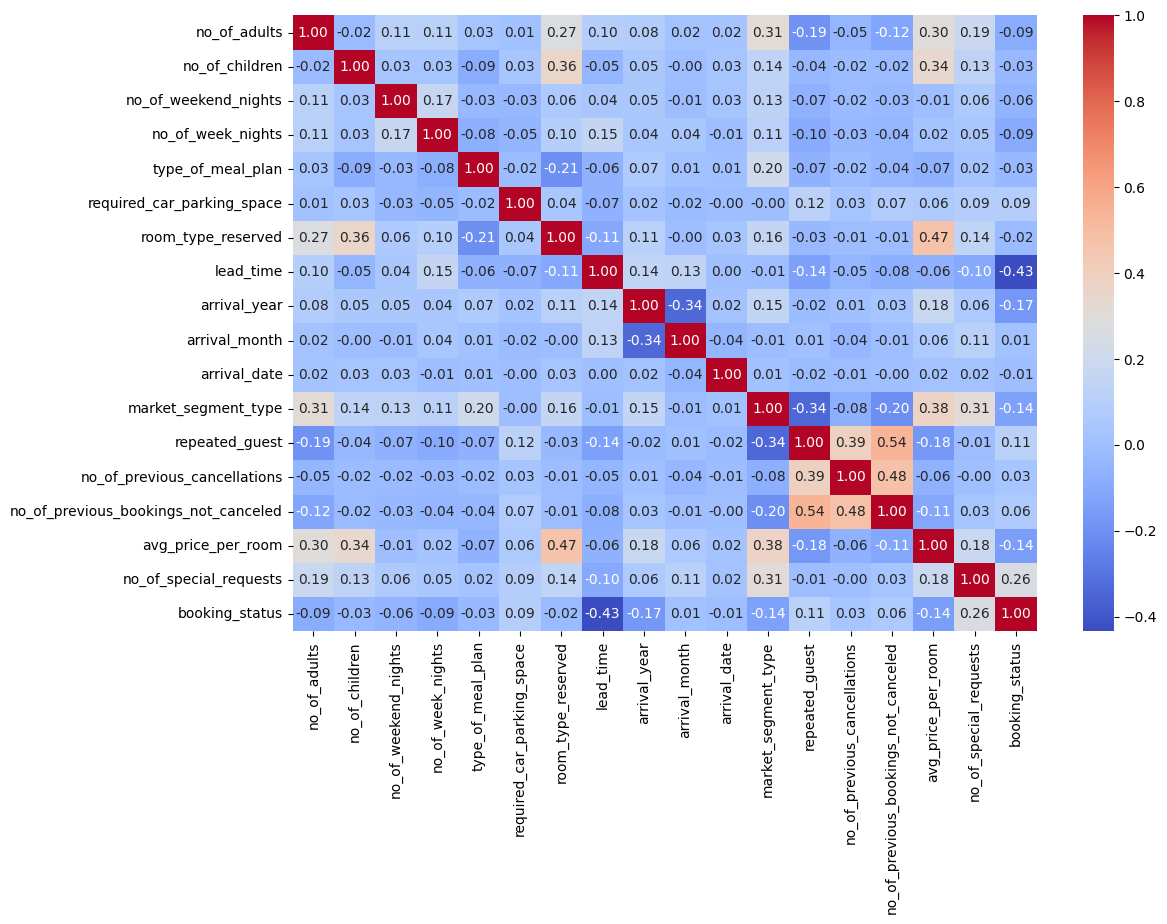

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [83]:
#### SKEWNESS IN DATA ####

In [84]:
skewness = df.skew()

In [85]:
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [98]:
for col in df.columns:
    if skewness[col] > 5.0:
        df[col] = np.log1p(df[col])

In [103]:
skewness = df.skew()

In [104]:
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            10.407178
no_of_previous_bookings_not_canceled     6.580532
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [106]:
for col in df.columns:
    if skewness[col] > 5.0:
        df[col] = np.log1p(df[col])

In [107]:
#### Imbalanced DATASET ####

In [116]:
df["booking_status"].value_counts()
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [109]:
X.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [110]:
!pip install imbalanced-learn

In [111]:
y.value_counts()

NameError: name 'y' is not defined

In [113]:
df["booking_status"].value_counts()


booking_status
1    19551
0     9469
Name: count, dtype: int64

In [114]:
from imblearn.over_sampling import SMOTE

In [119]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

TypeError: 'SMOTE' object is not callable

In [120]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [121]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
39097    0
39098    0
39099    0
39100    0
39101    0
Name: booking_status, Length: 39102, dtype: int64

In [122]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [123]:
df.shape

(29020, 18)

In [124]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [125]:
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39097,2,0,1,2,0,0.0,3,189,2018,10,28,4,0.0,0.0,0.0,109.800000,0,0
39098,2,1,0,1,0,0.0,0,11,2018,11,5,4,0.0,0.0,0.0,150.000000,1,0
39099,2,0,0,2,0,0.0,0,308,2018,11,25,3,0.0,0.0,0.0,52.000000,0,0
39100,2,0,0,2,1,0.0,0,377,2018,10,14,4,0.0,0.0,0.0,115.000000,1,0


In [126]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [127]:
balanced_df.shape

(39102, 18)

In [128]:
df = balanced_df.copy()

In [129]:
df.shape

(39102, 18)

In [130]:
len(df.columns)

18

In [131]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [132]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
feature_importance = model.feature_importances_

In [138]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [ ]:
top_features_importance_df =feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
7,lead_time,0.299666
15,avg_price_per_room,0.152529
16,no_of_special_requests,0.141120
9,arrival_month,0.086444
10,arrival_date,0.083111
11,market_segment_type,0.056515
3,no_of_week_nights,0.044944
2,no_of_weekend_nights,0.032140
8,arrival_year,0.023398
0,no_of_adults,0.021247


In [146]:
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [147]:
top_10_df

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.000000,0,10,17,4,1,2,2017,2,1
1,98,121.500000,2,7,16,4,1,1,2018,2,1
2,433,70.000000,0,9,8,3,3,0,2018,2,0
3,195,72.250000,0,8,8,3,5,2,2018,2,1
4,188,130.000000,0,6,15,3,2,0,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...
39097,189,109.800000,0,10,28,4,2,1,2018,2,0
39098,11,150.000000,1,11,5,4,1,0,2018,2,0
39099,308,52.000000,0,11,25,3,2,0,2018,2,0
39100,377,115.000000,1,10,14,4,2,0,2018,2,0


In [148]:
len(top_10_df.columns)

11

In [151]:
df = top_10_df.copy()



In [150]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 8.4 MB/s eta 0:00:09
   - -------------------------------------- 3.1/72.0 MB 7.7 MB/s eta 0:00:09
   -- ------------------------------------- 4.5/72.0 MB 7.7 MB/s eta 0:00:09
   --- ------------------------------------ 5.5/72.0 MB 6.9 MB/s eta 0:00:10
   --- ------------------------------------ 6.3/72.0 MB 6.2 MB/s eta 0:00:11
   ---- ----------------------------------- 7.9/72.0 MB 6.5 MB/s eta 0:00:10
   ----- ---------------------------------- 9.4/72.0 MB 6.7 MB/s eta 0:00:10
   ----- ---------------------------------- 10.2/72.0 MB 6.1 MB/s eta 0:00:11
   ------ --------------------------------- 11.3/72.0 MB 5.9 MB/s eta 0:00:11
   ------ --------------------------------- 12.1/72.0 MB 6.1 MB/s eta 0:00:10
   ------- -------------------------------- 13.1/72.0 MB 5.6 MB/s eta 0:00:11
   -------- ------------------------------- 14.7/72.0 MB 5.8 MB/s eta 0:00:10
 

In [152]:
##### MODEL SELECTION #####

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [154]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [158]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42)
}

In [157]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [159]:

for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)


[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [160]:
metrics_df = pd.DataFrame(metrics)

In [161]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.914845,0.910660,0.919528,0.915073
1,LogisticRegression,0.792098,0.799631,0.778319,0.788831
2,Gradient Boosting,0.842220,0.845059,0.837263,0.841143
3,AdaBoost,0.803734,0.826663,0.767555,0.796013
4,XGBoost,0.895921,0.893677,0.898257,0.895961
5,LightGBM,0.886715,0.880616,0.894157,0.887335
6,Decision Tree,0.881857,0.884159,0.878268,0.881203
7,Naive Bayes,0.755146,0.775589,0.716556,0.744905
8,KNN,0.831991,0.857656,0.795233,0.825266
9,Support Vector Classifier,0.695308,0.661150,0.798565,0.723389


In [162]:
#### TRAIN RANDOM FOREST CLASSIFIER AS IT HAS THE HIGHEST ACCURACY ####

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [164]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [166]:
rf = RandomForestClassifier(random_state=42)

In [167]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}


In [168]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy',
)


In [169]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  11.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  14.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  14.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.5s
[C

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0024A67B66B50>, 'min_samples_leaf': <scipy.stats....0024A6775BA10>, 'min_samples_split': <scipy.stats....0024A67759CD0>, ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [170]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [171]:
best_rf_model = random_search.best_estimator_

In [172]:
y_pred = best_rf_model.predict(X_test)

In [173]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9186
Precision: 0.9076
Recall: 0.9320
F1 Score: 0.9196


In [174]:
#### save the model using joblib ####

In [175]:
import joblib

In [176]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [177]:
loaded_model = joblib.load('random_forest.pkl') 

In [178]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
10599,152,84.52,0,9,30,4,4,0,2017,2


In [180]:
new_data = np.array([152, 84.52, 0, 9, 30, 4, 4, 0, 2017, 2]).reshape(1, -1)

In [ ]:
predictions = loaded_model.predict(new_data)

In [183]:
predictions

array([0])